<a href="https://colab.research.google.com/github/AntonV666/Diplom/blob/main/Anton_Vavilov/Vtormet_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Обучение на размеченном датасете (80 изо).


#**Загрузка библиотек и видео**

In [ ]:
!pip install ultralytics==8.0.227

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 660.5/660.5 kB 9.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
import numpy as np
import os
import gdown
from IPython import display
display.clear_output()
import glob
import ultralytics
ultralytics.checks()
from ultralytics import YOLO
import time, random, gdown, os
from IPython.display import display, Image
import zipfile
import cv2
from matplotlib import pyplot as plt
import shutil
%matplotlib inline

Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/78.2 GB disk)


In [ ]:
# Монтируем диск при необходимости
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


#**Загрузка изображения после дететирования и обучение YOLO**

In [ ]:
# команда для вывода информации о видеокарте
# !nvidia-smi

Sat Jun  8 11:51:33 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# удалим папку non_existent_folder из директории /content/...
# shutil.rmtree('/content/runs')

In [ ]:
# Загрузка датасета с google диска, создание папки, распаковка
# Указываем ссылку
archive = 'https://drive.google.com/file/d/1lV5lobS_pOqbg1v9kpUHeAljtzmXeSk4/view?usp=sharing'
# Задание имени рабочего каталога
DATASET_DIR = '/content/dataset/'
# Создание рабочего каталога
os.mkdir(DATASET_DIR)
print('Рабочий каталог создан')
output_path = 'data.zip'           # Указываем файл
DATA_DIR = '/content/dataset/'     # Указываем путь для распаковки
gdown.download(archive, output_path, quiet=False, fuzzy=True) # Скачиваем
print('Архив успешно скачен')
!unzip -q -o 'data.zip' -d {DATA_DIR} # распаковываем архив
print('Архив успешно разархивирован')
os.remove(output_path)
print('Архив успешно удален')

Рабочий каталог создан


Downloading...
From (original): https://drive.google.com/uc?id=1lV5lobS_pOqbg1v9kpUHeAljtzmXeSk4
From (redirected): https://drive.google.com/uc?id=1lV5lobS_pOqbg1v9kpUHeAljtzmXeSk4&confirm=t&uuid=fc55d713-1645-4349-b037-97b458c1687d
To: /content/data.zip
100%|██████████| 300M/300M [00:02<00:00, 127MB/s]


Архив успешно скачен
Архив успешно разархивирован
Архив успешно удален


In [ ]:
# загружаем классическую yolov8n для object detection
model = YOLO("yolov8n.pt")

!yolo task=detect mode=train model=yolov8n.pt data=/content/dataset/data.yaml epochs=20 imgsz=640 # data.yaml

New https://pypi.org/project/ultralytics/8.2.28 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/dataset/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=Fals

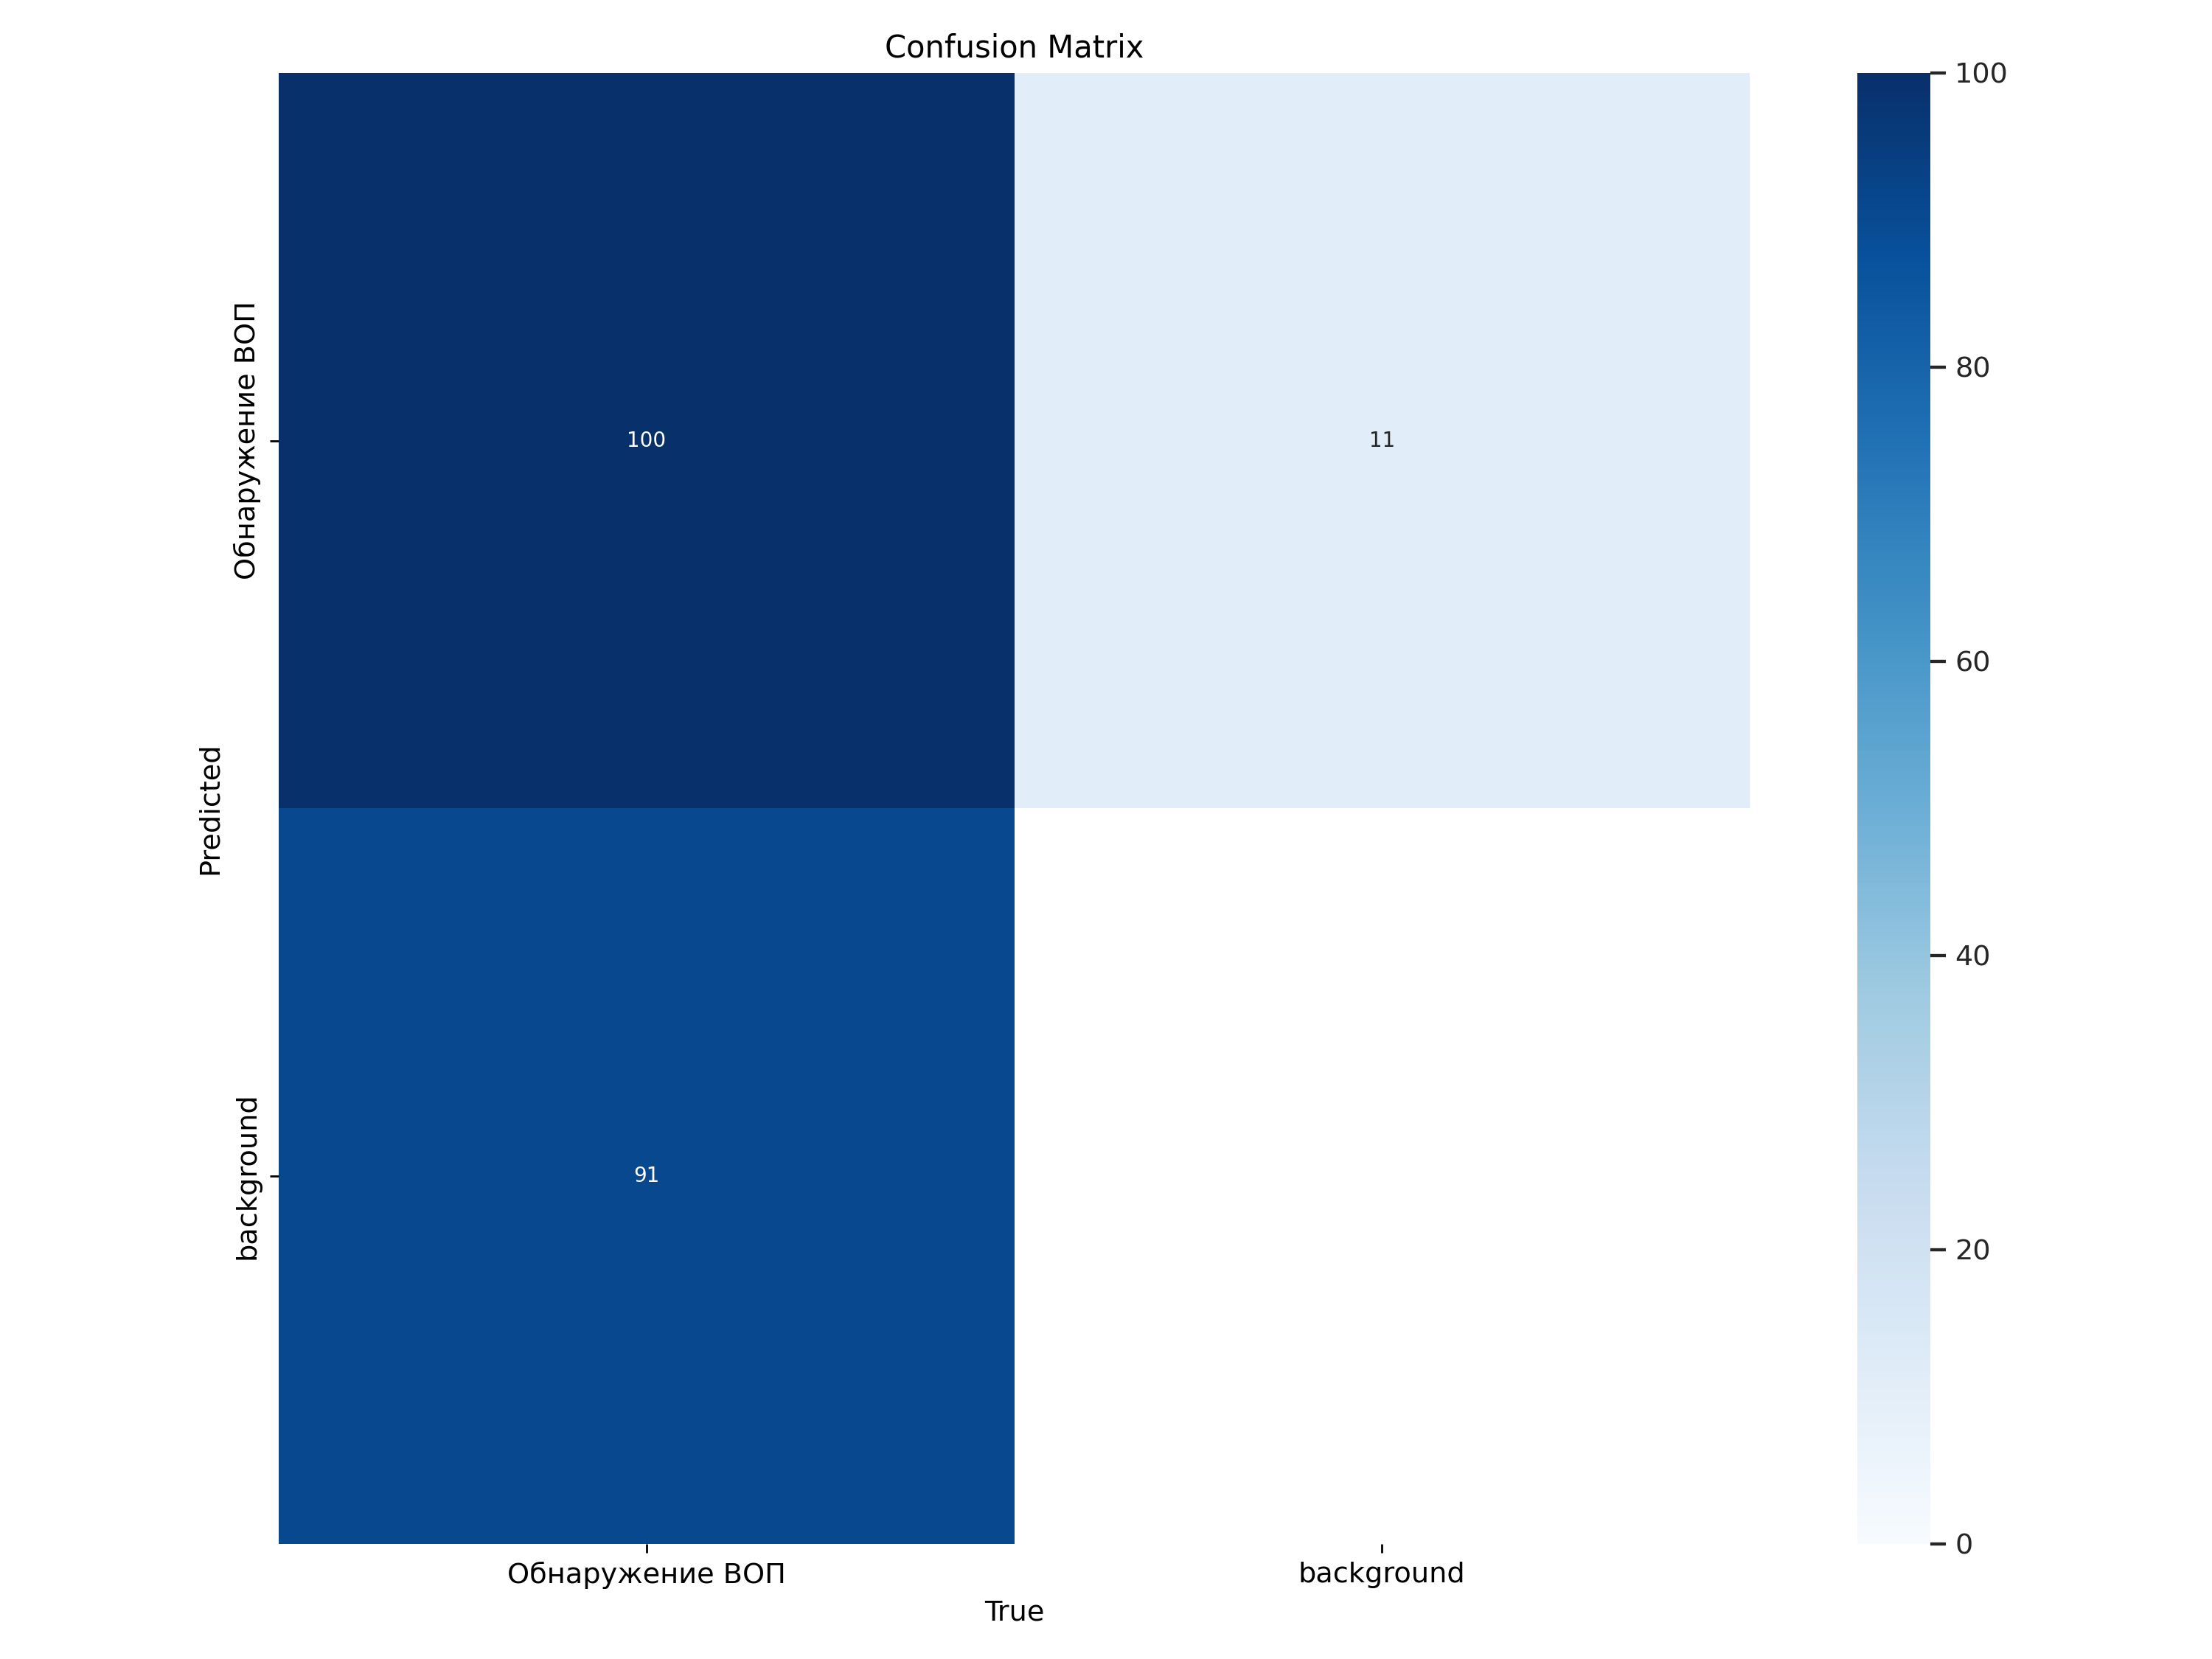

In [ ]:
# Матрица ошибок
Image(filename=f'/content/runs/detect/train/confusion_matrix.png')

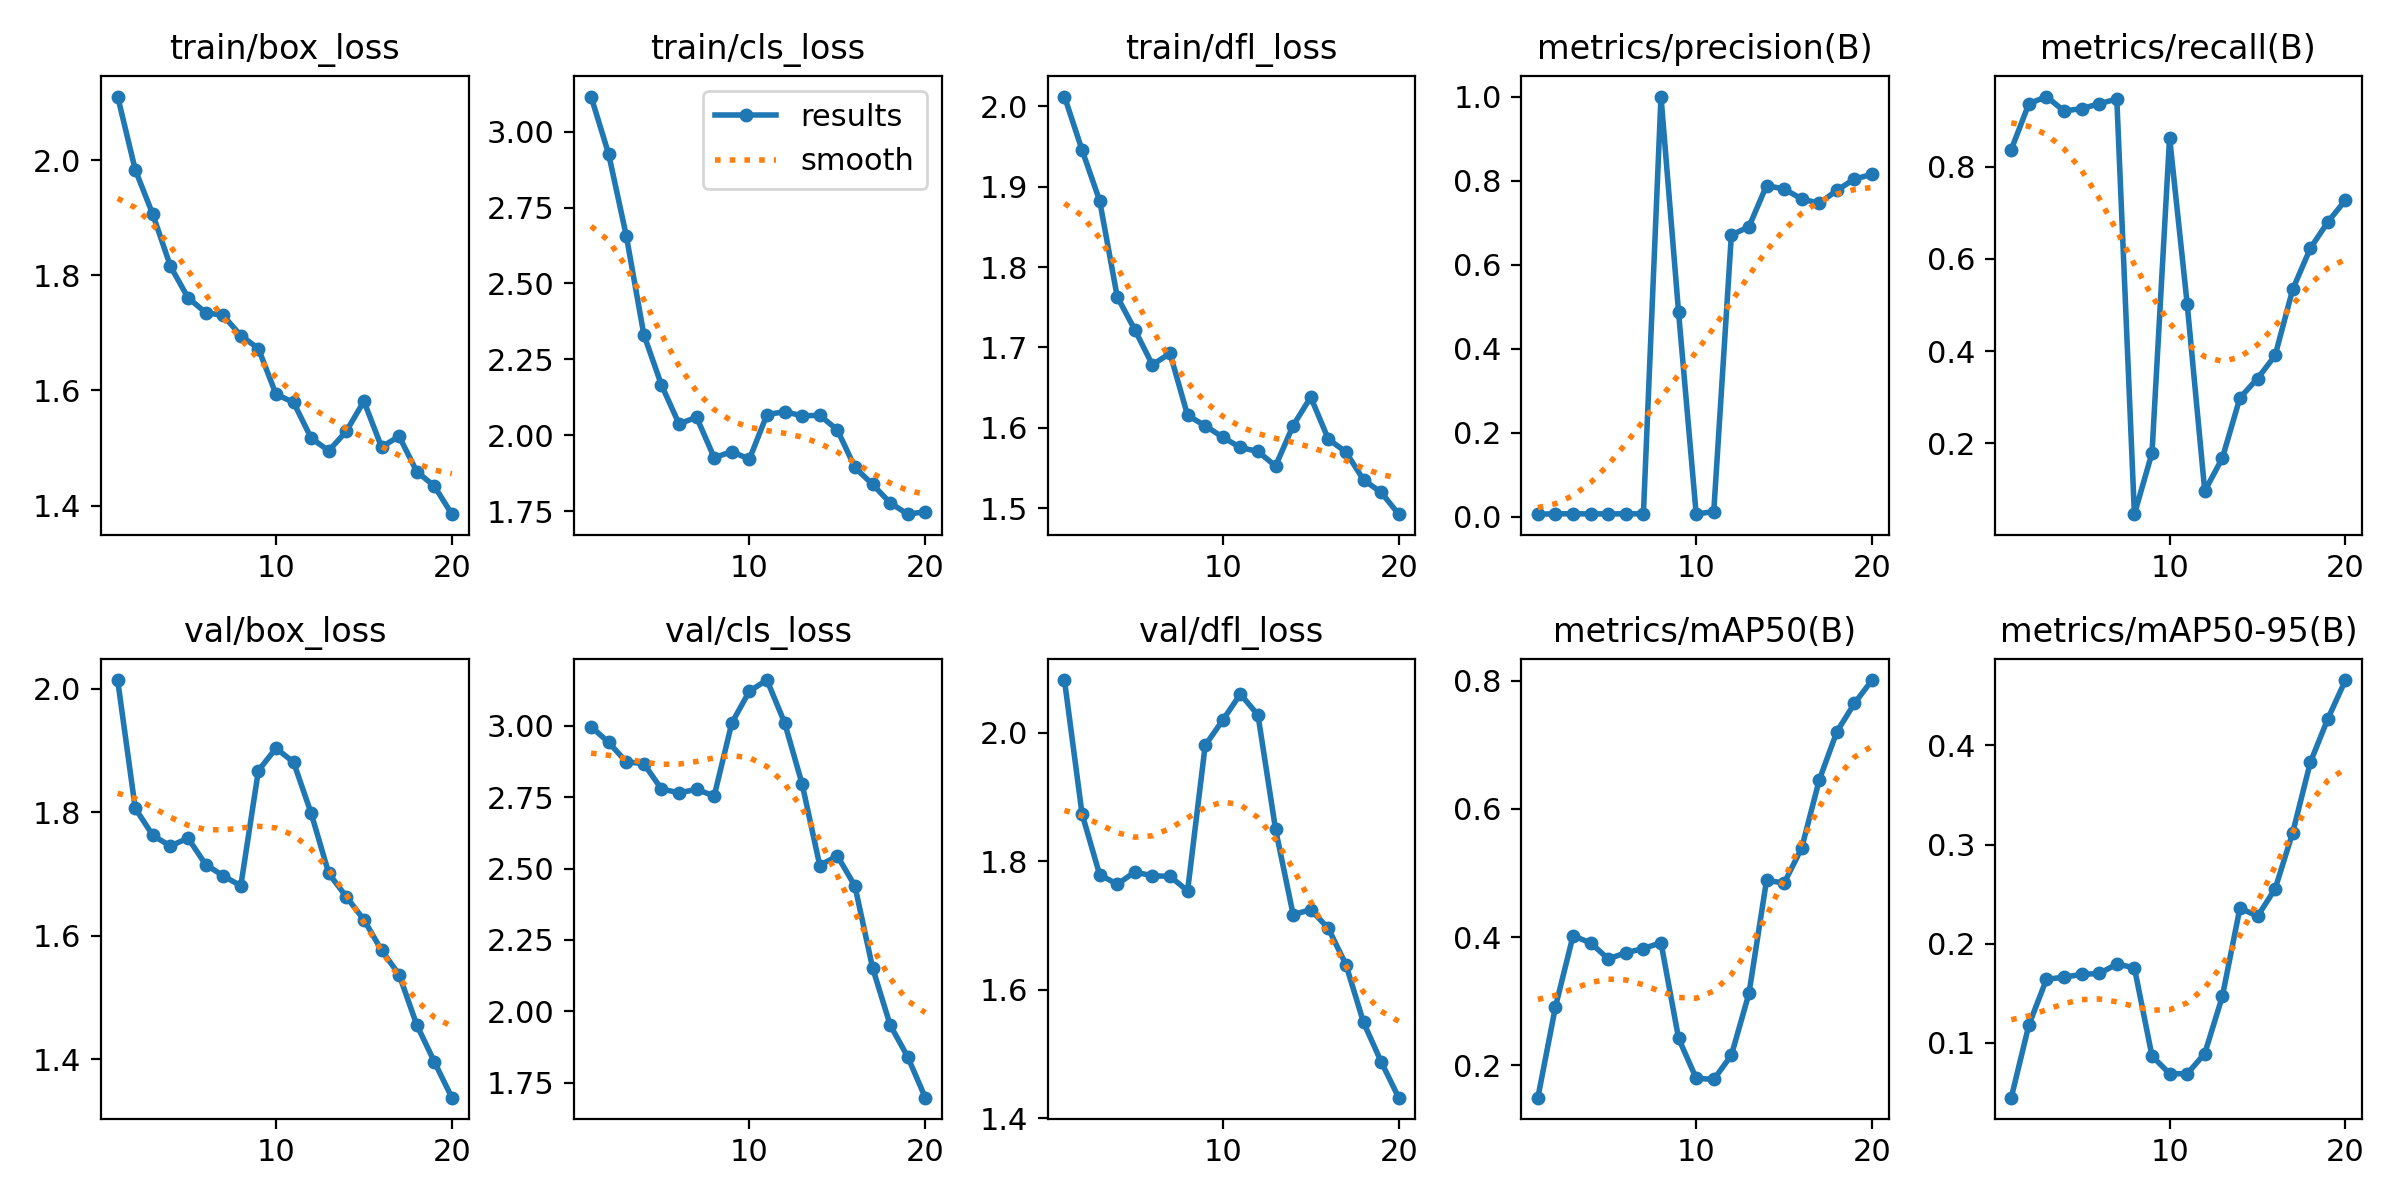

In [ ]:
# графики результатов
Image(filename=f'/content/runs/detect/train/results.png')

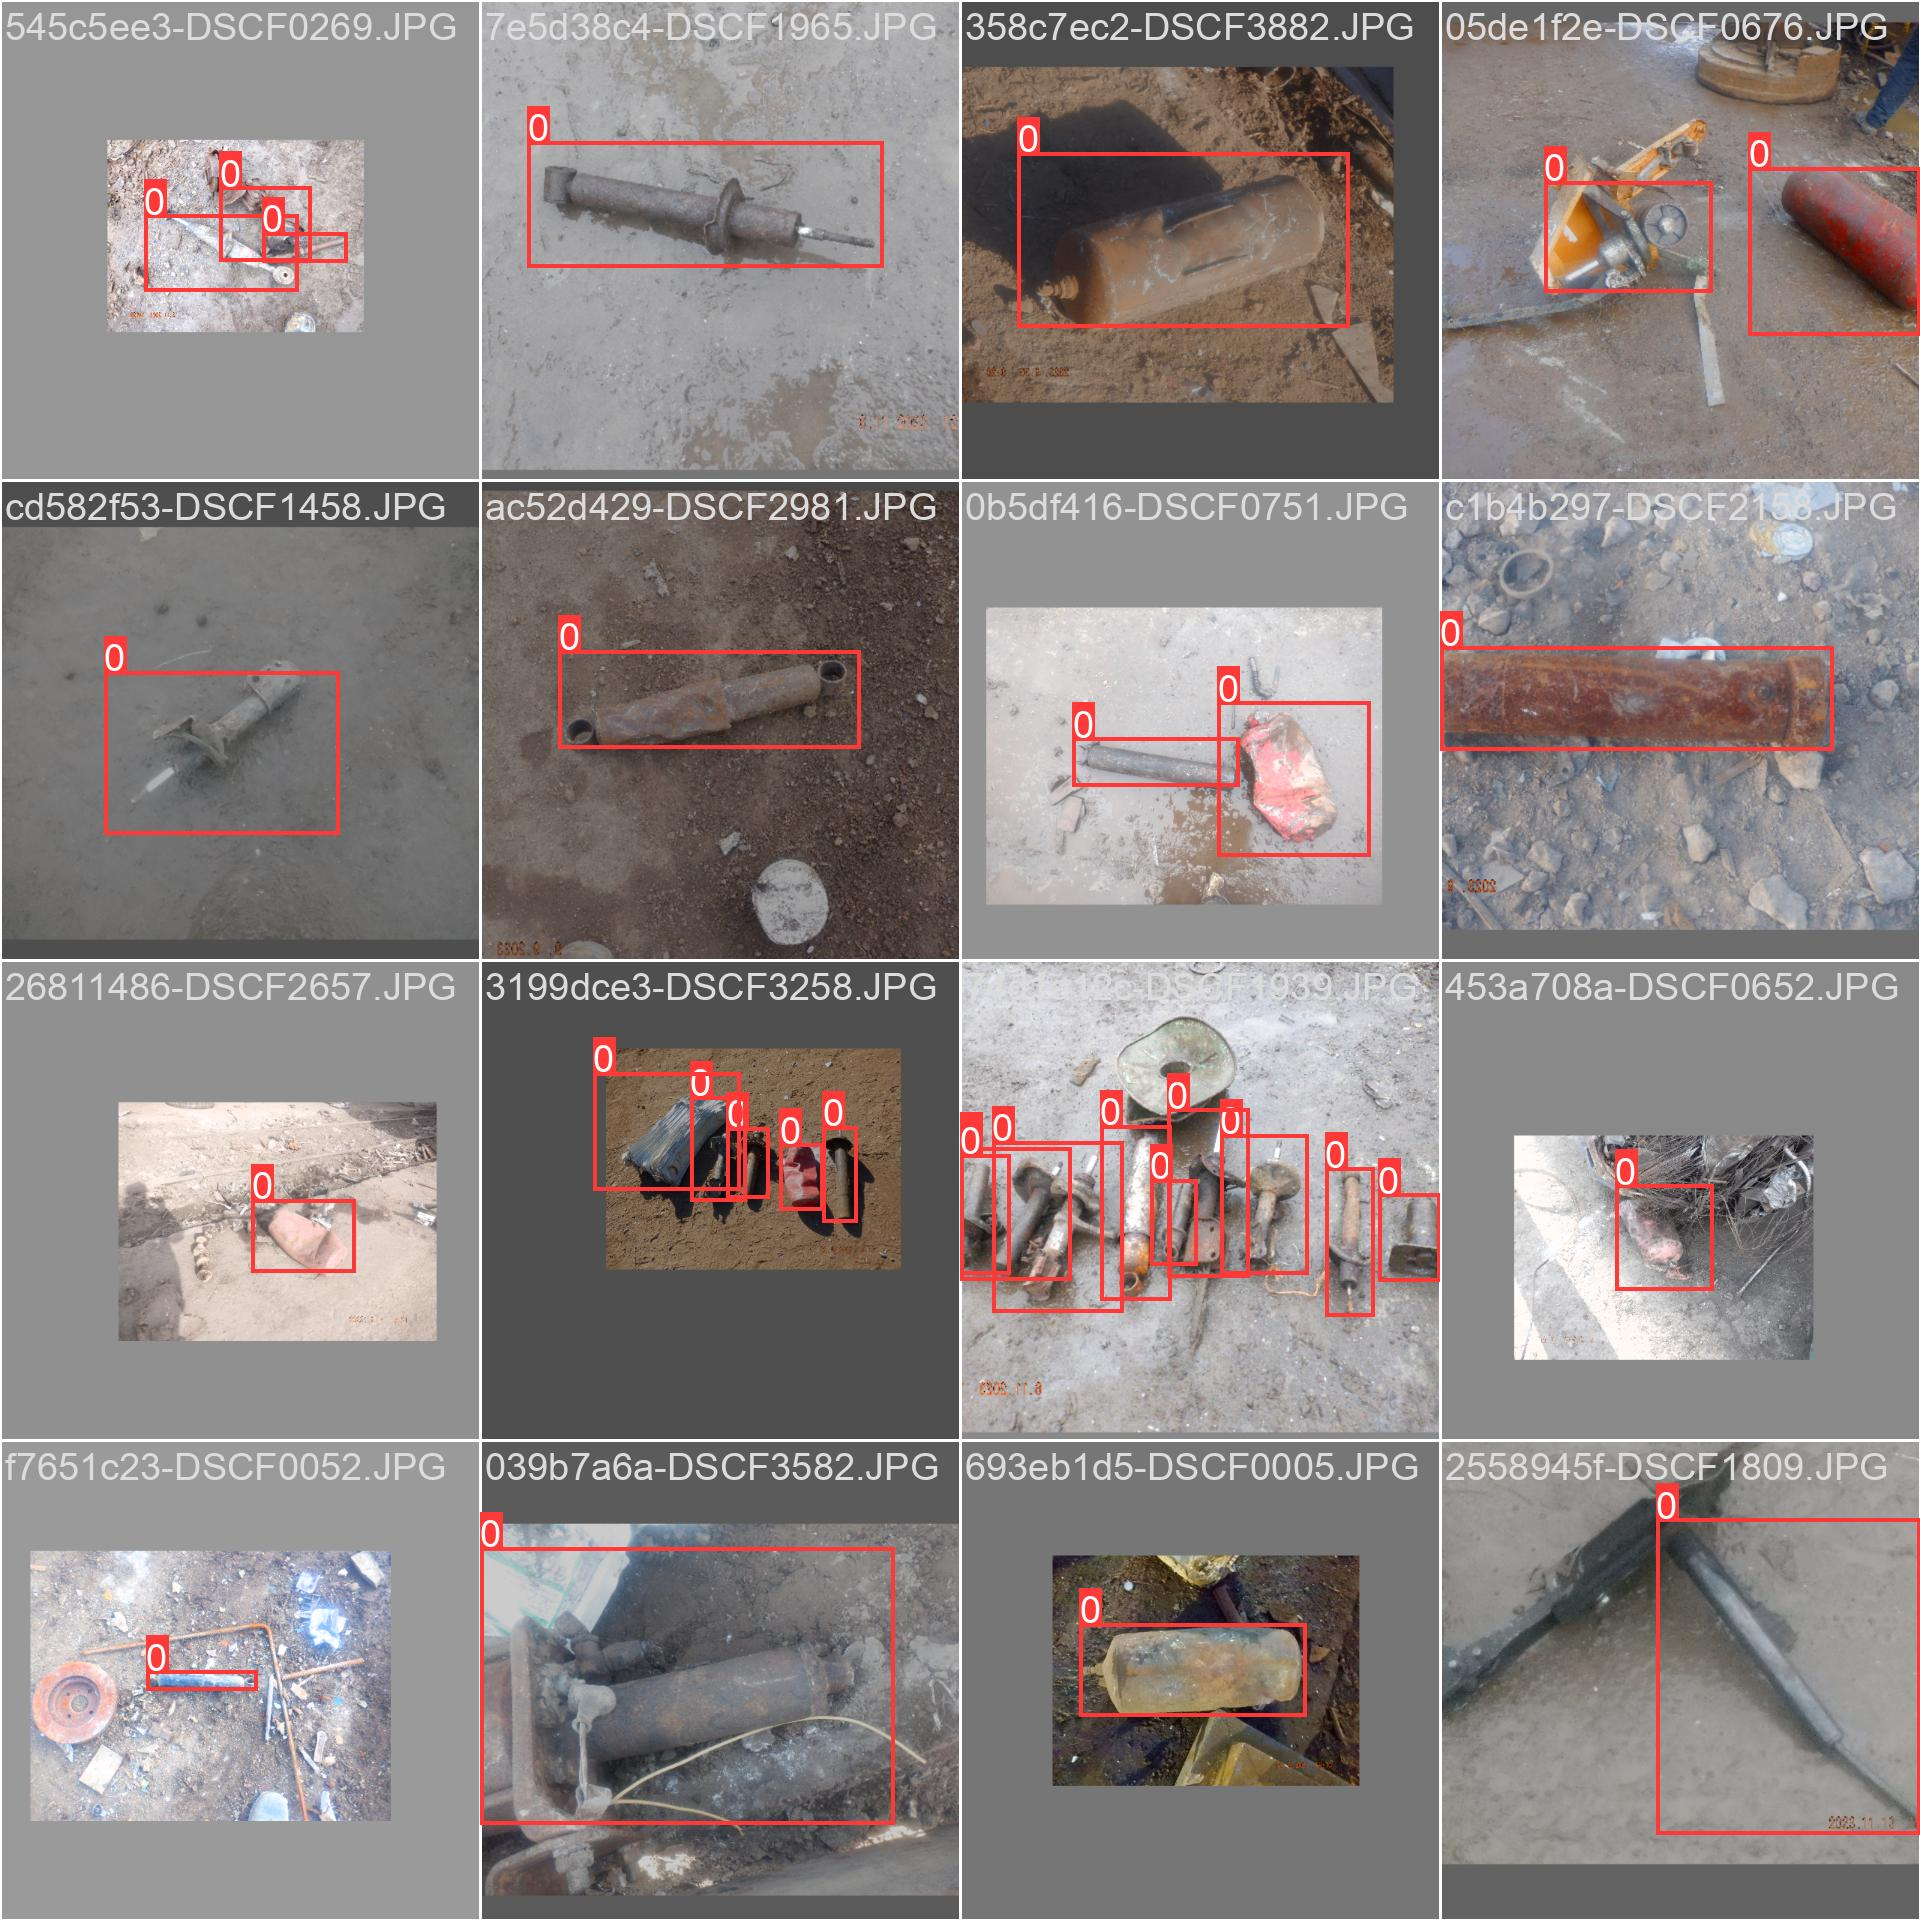

In [ ]:
# Визуализация
Image(filename=f'/content/runs/detect/train/train_batch52.jpg')

In [ ]:
!yolo task=detect mode=val model='/content/runs/detect/train/weights/best.pt' data='/content/dataset/data.yaml'

Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/dataset/labels.cache... 80 images, 0 backgrounds, 0 corrupt: 100% 80/80 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 5/5 [00:22<00:00,  4.52s/it]
                   all         80        191       0.82      0.728      0.801      0.466
Speed: 1.6ms preprocess, 7.2ms inference, 0.0ms loss, 16.5ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
# Дообучение
!yolo task=detect mode=train model='/content/runs/detect/train/weights/best.pt' data='/content/dataset/data.yaml' epochs=20 imgsz=640

New https://pypi.org/project/ultralytics/8.2.28 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/runs/detect/train/weights/best.pt, data=/content/dataset/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=Fals

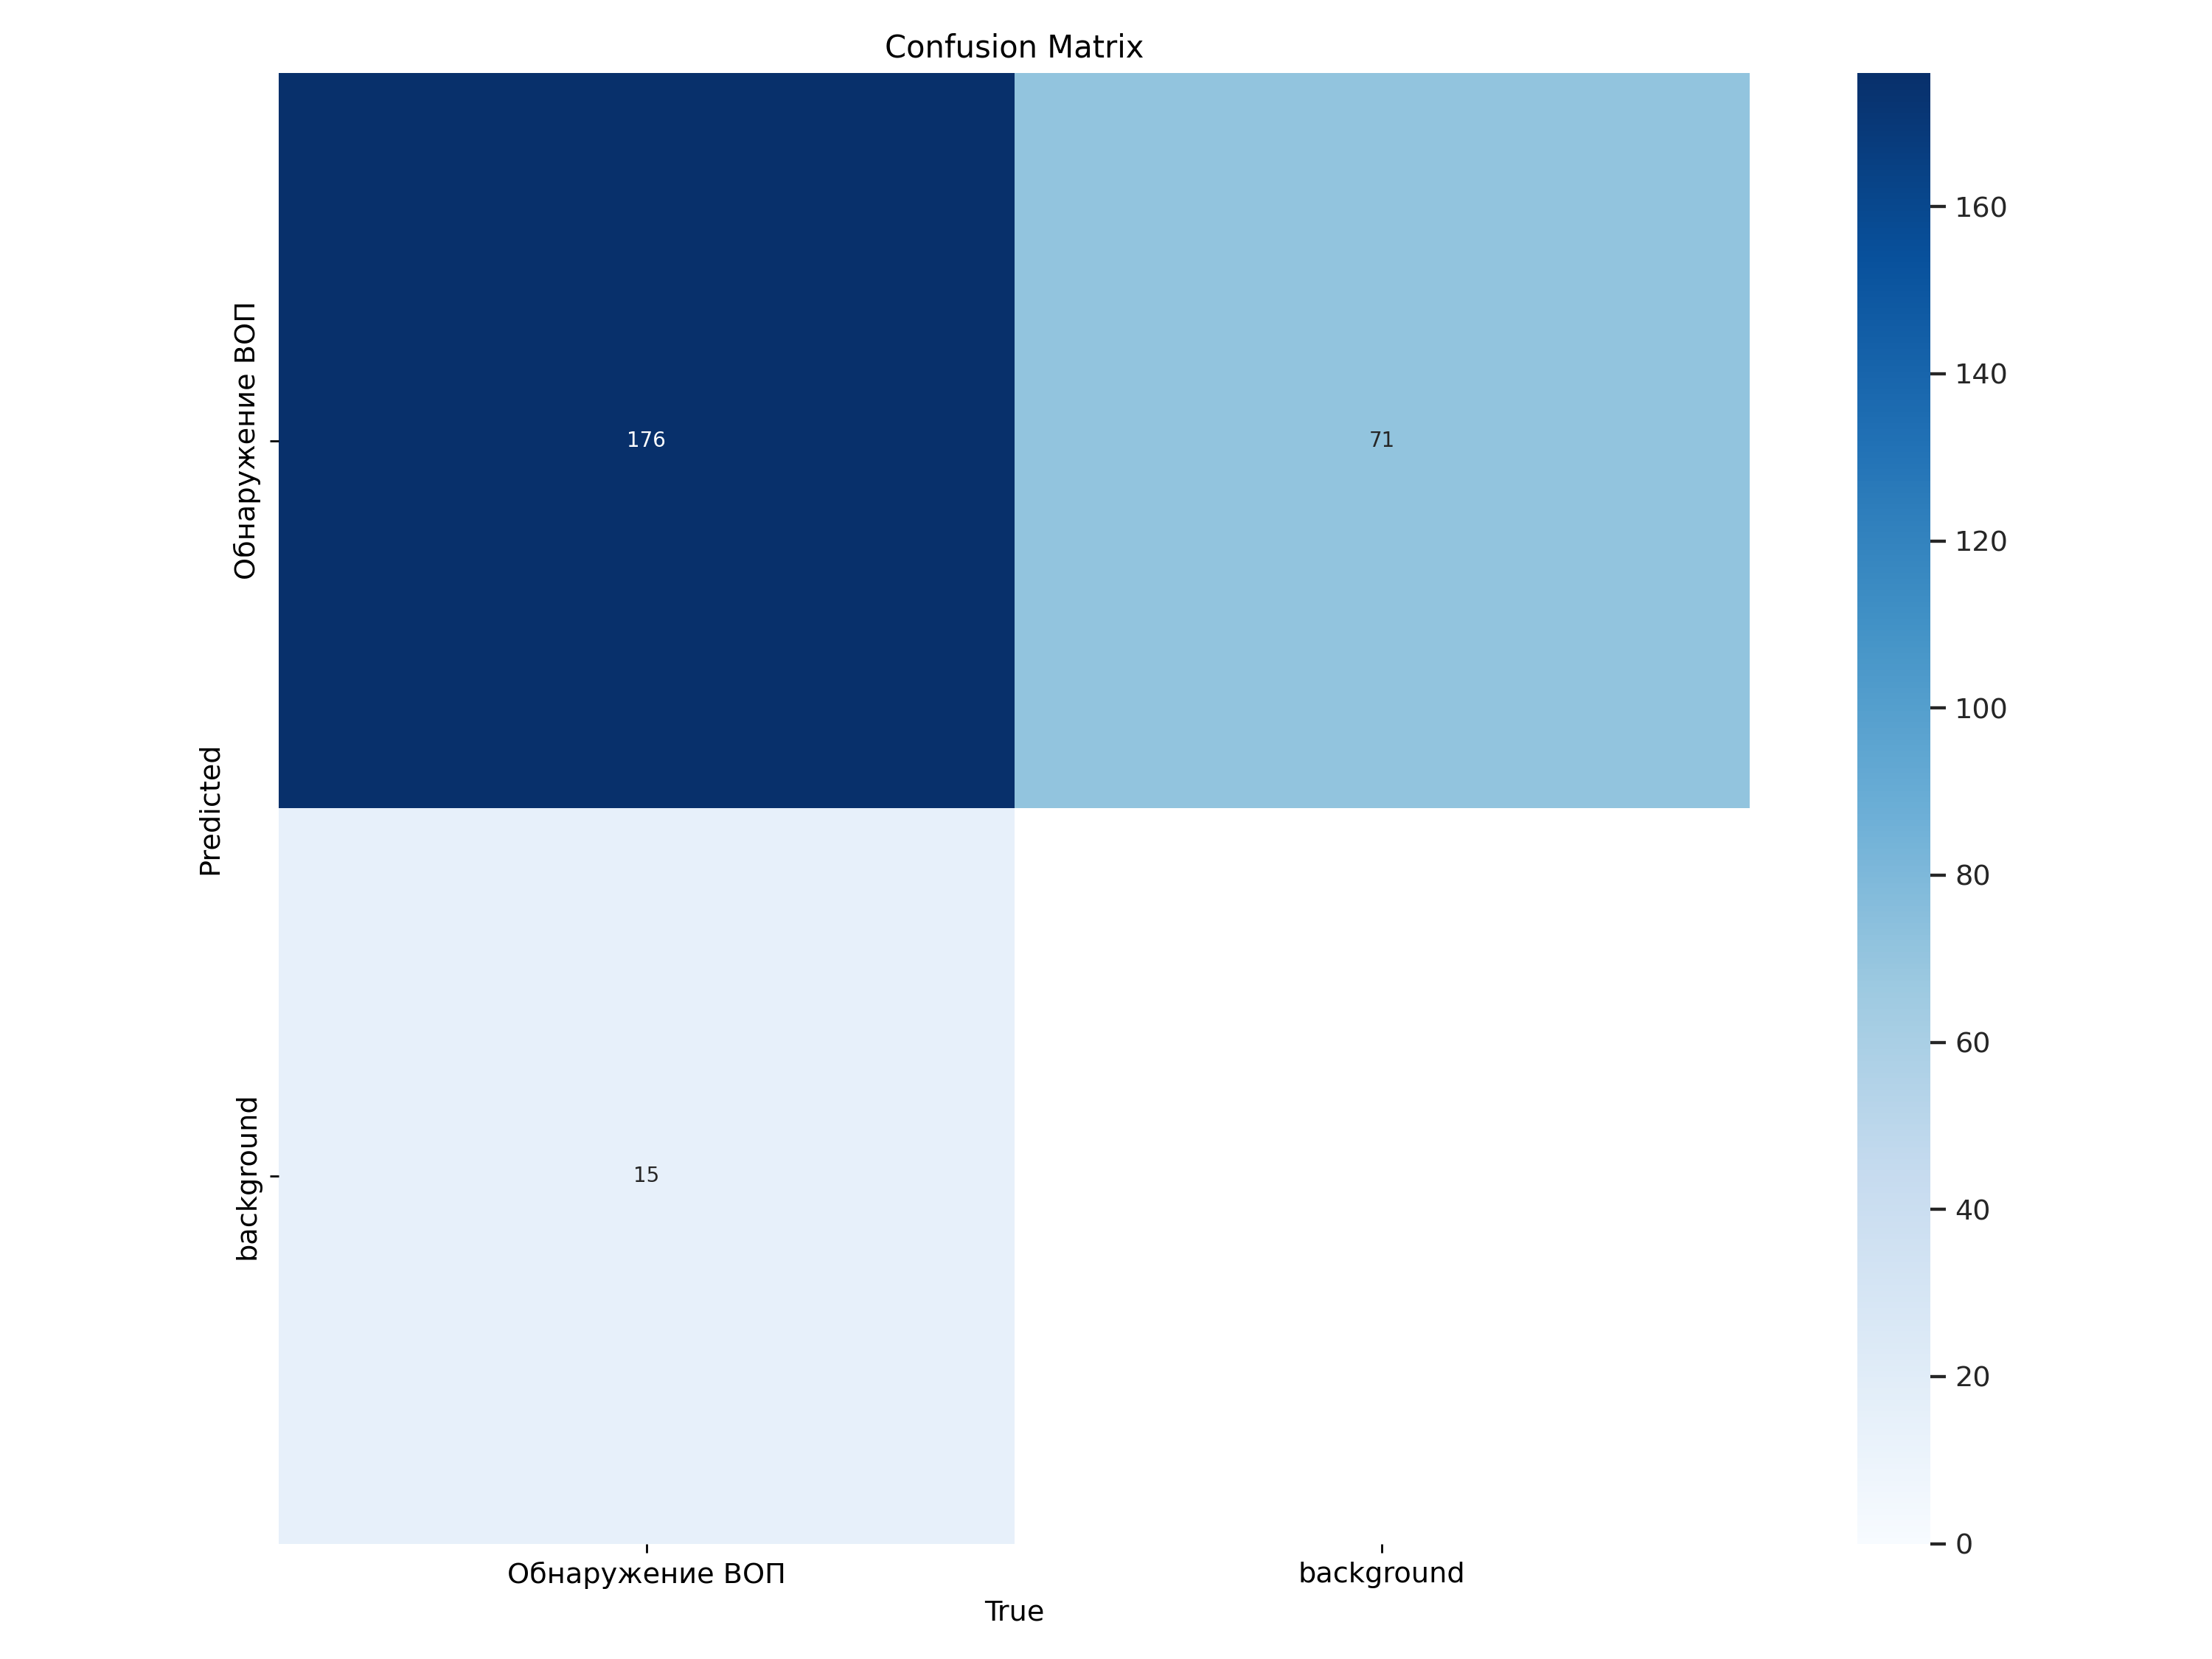

In [ ]:
Image(filename=f'/content/runs/detect/train2/confusion_matrix.png')

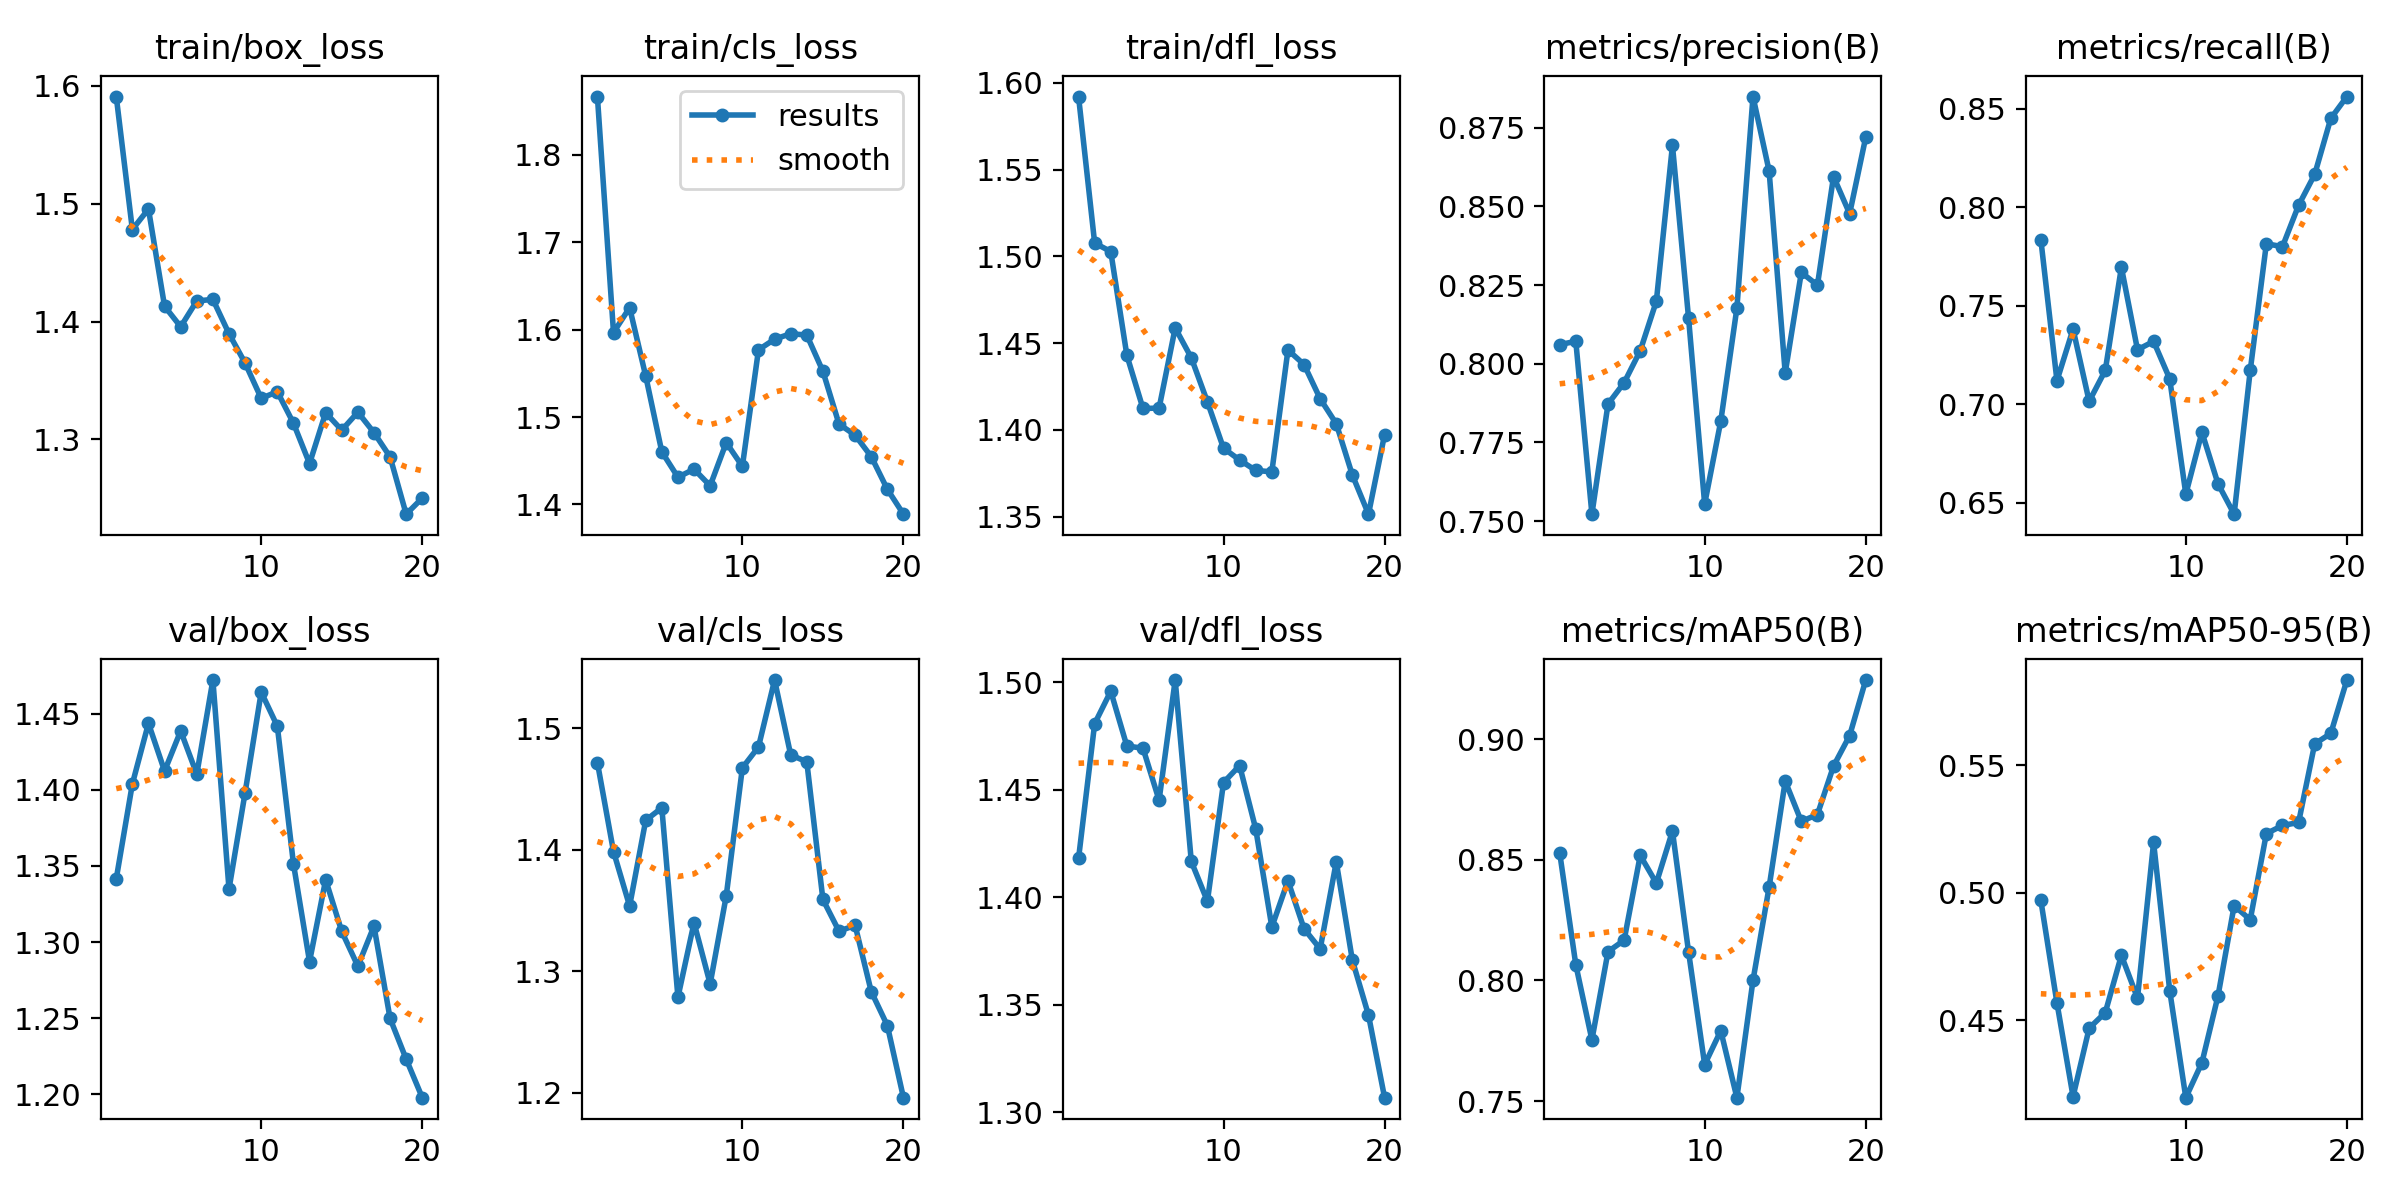

In [ ]:
Image(filename=f'/content/runs/detect/train2/results.png')

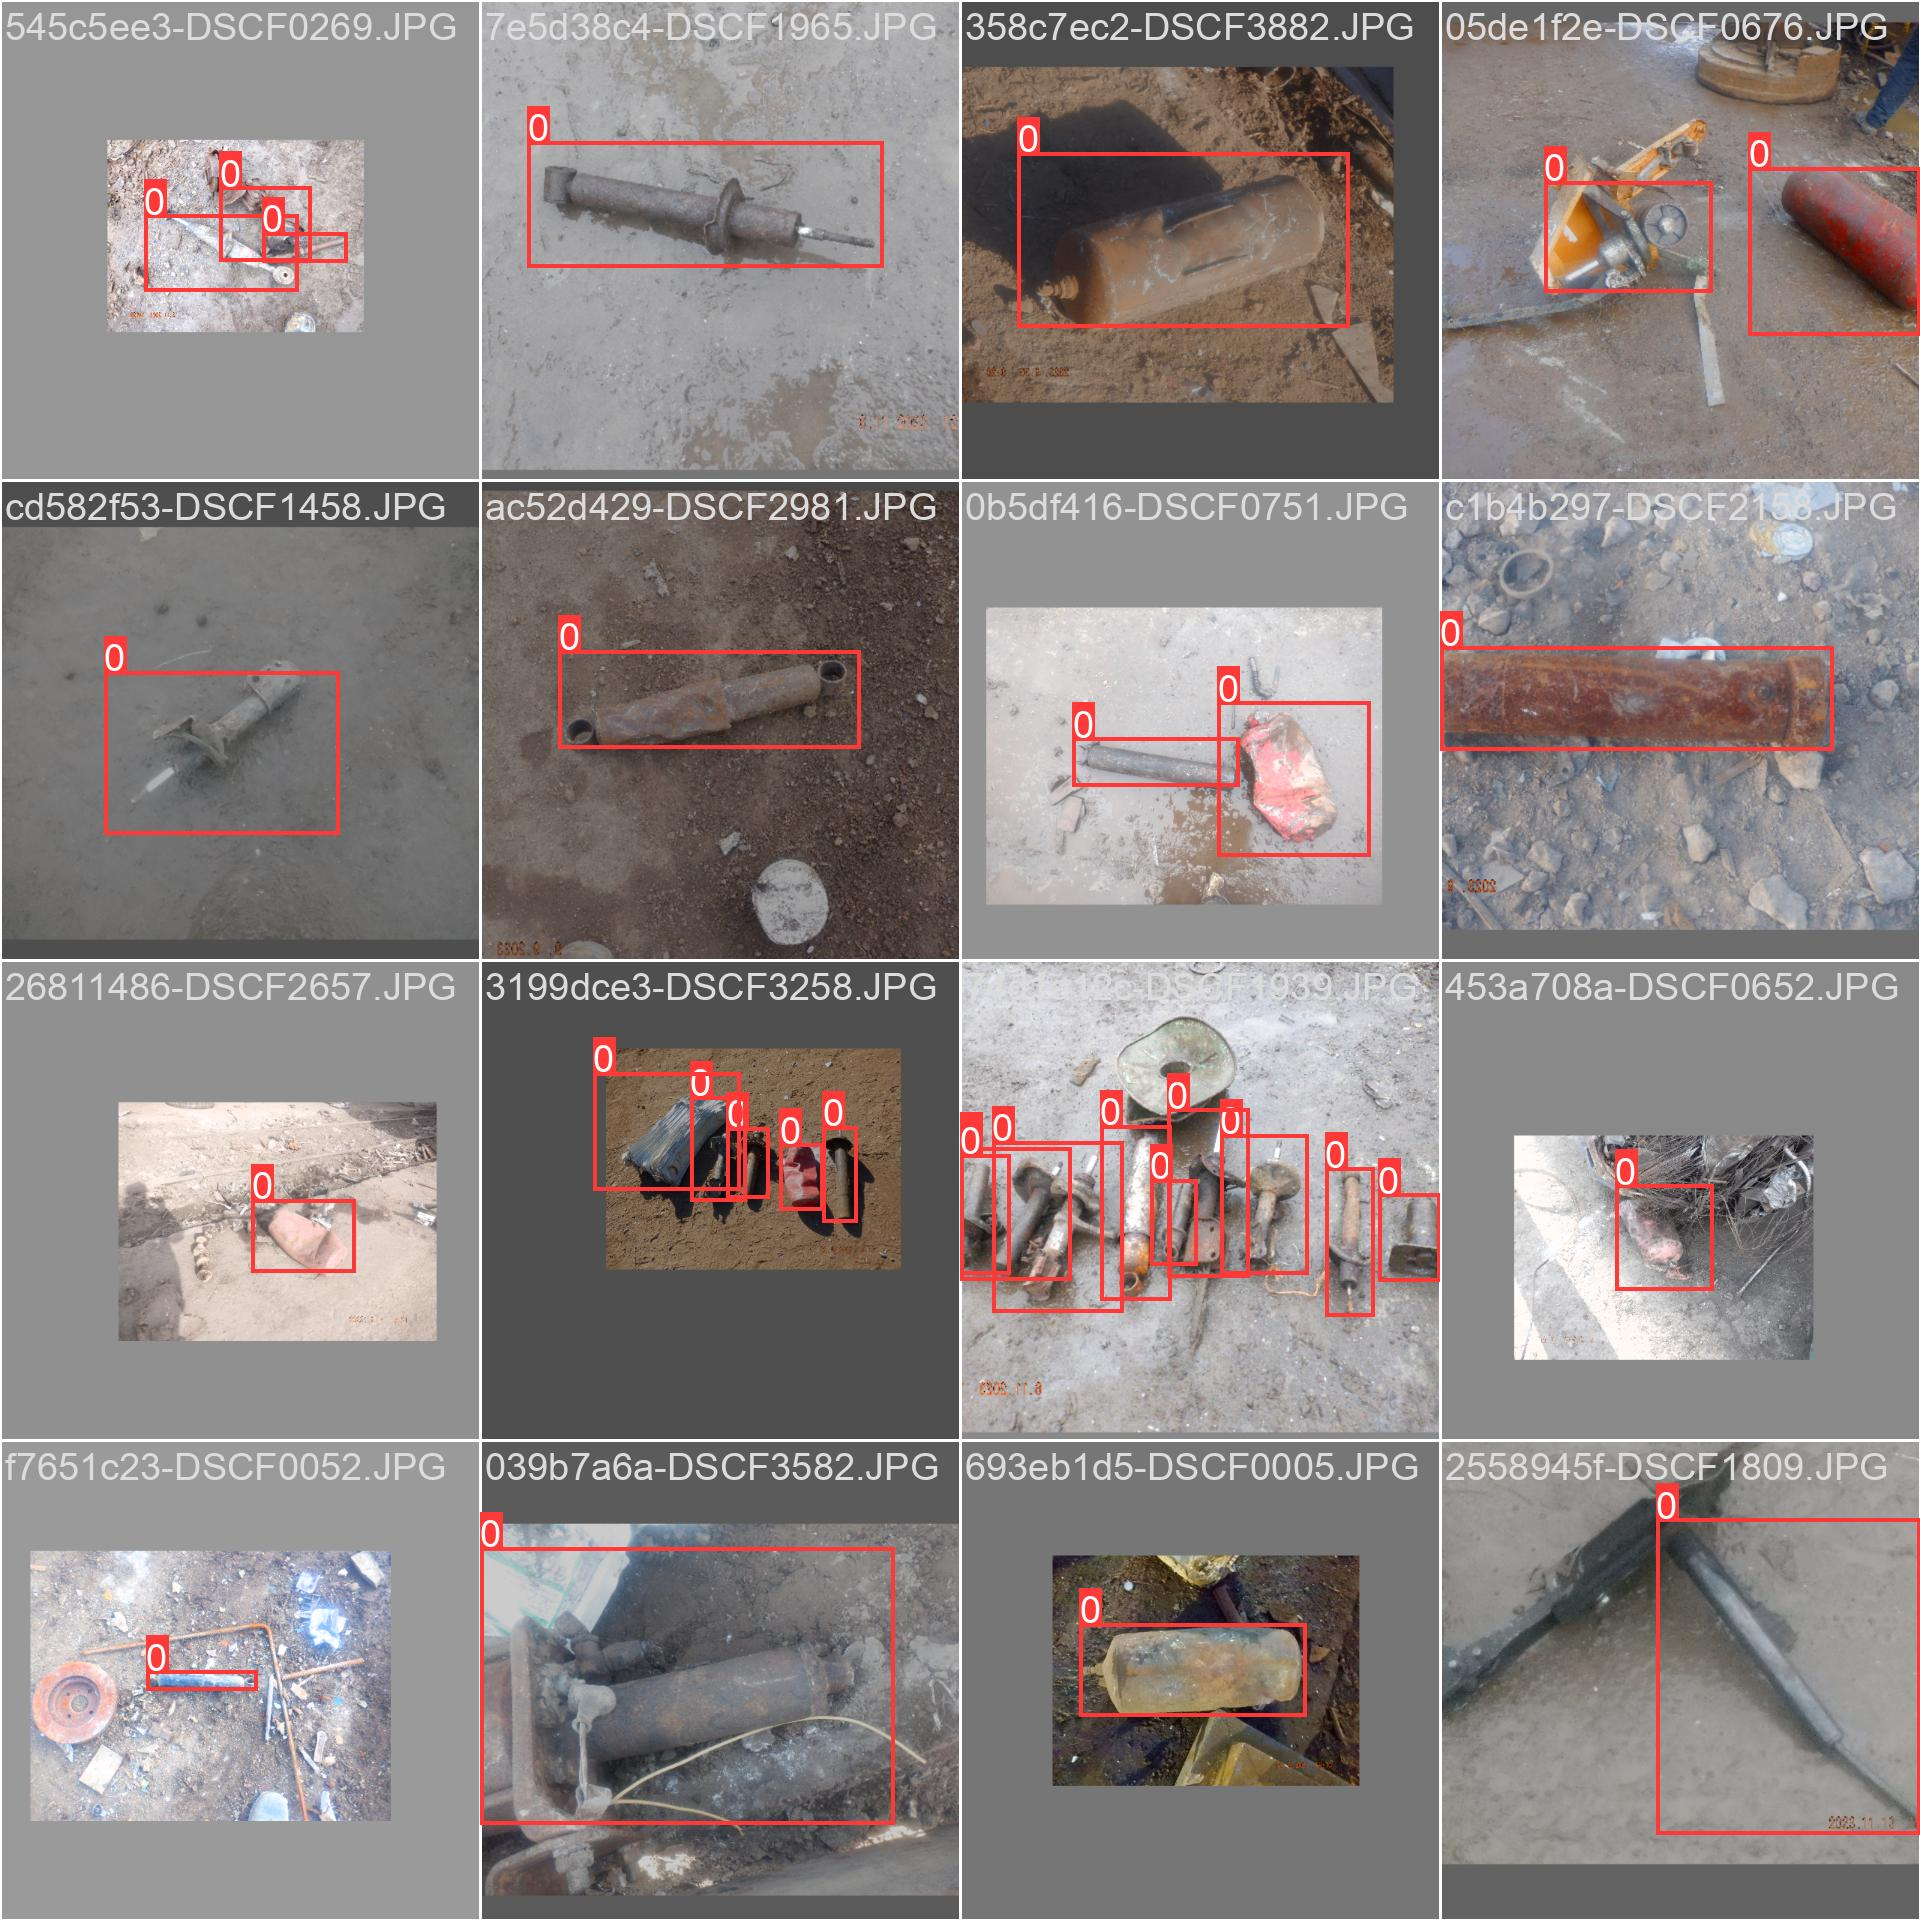

In [ ]:
Image(filename=f'/content/runs/detect/train2/train_batch52.jpg')

In [ ]:
# Сохраняем лучшие веса на гугл диск
shutil.copyfile("/content/runs/detect/train2/weights/best.pt", "//content/drive/MyDrive/Стажировка 3. Vtormet/best_v1.pt")
print('Веса best.pt сохранены на Google диск!')

Веса best.pt сохранены на Google диск!
